In [1]:
# Importing packages

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from nltk import wordpunct_tokenize, word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
plt.rcParams["figure.figsize"] = (10,5)

### Data cleaning

In [2]:
# Reading in the data
Combined_Lyrics = pd.read_csv("../CSV files/Combined_Lyrics.csv")

In [3]:
# Creating a list of stop words, creating a lemmatizer
sw = stopwords.words('english')
wn = WordNetLemmatizer()

### Vectorizing lyrics

In [4]:
# Vectorizing lyrics data
cv = CountVectorizer(stop_words=sw, min_df=50)
X_cv = cv.fit_transform(Combined_Lyrics['Lyrics'])

In [5]:
# Converting the vectorized lyrics object to a dataframe
Vectorized_df = pd.DataFrame(X_cv.toarray(), columns = cv.get_feature_names())

# Appending on Artist and Genre
Vectorized_df = pd.concat([Vectorized_df, Combined_Lyrics[['Artist','Genre']]], axis = 1)

# Reordering the columns
cols_to_move = ['Artist', 'Genre']
Vectorized_df = Vectorized_df[ cols_to_move + [ col for col in Vectorized_df.columns if col not in cols_to_move ] ]

In [6]:
# Tfid Vectorzing lyrics data
tf = TfidfVectorizer(max_df = 0.95, min_df = 50)
X_tf = tf.fit_transform(Combined_Lyrics['Lyrics'])

In [7]:
# Converting tfid lyrics to object to a dataframe
Tfid_df = pd.DataFrame(X_tf.toarray(), columns=tf.get_feature_names())
Tfid_df = pd.concat([Tfid_df, Combined_Lyrics[['Artist','Genre']]], axis = 1)

# Reordering columns
cols_to_move = ['Artist', 'Genre']
Tfid_df = Tfid_df[ cols_to_move + [ col for col in Tfid_df.columns if col not in cols_to_move ] ]

### Defining expalanatory and response variables, train test split

In [8]:
# Defining explanatory and response variables

y = Tfid_df['Genre']
text = Tfid_df.drop(['Genre','Artist'], axis = 1)

In [9]:
# Train test split
text_train, text_test, y_train, y_test = train_test_split(text,y, stratify = y, random_state=117, test_size=.4)

In [10]:
# Instantiating empty lists to hold goodness of fit measures
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []

# Running a variety of classification models, recording goodness of fit statistics

## KNN

In [11]:
# Creating and fitting model, appending acuracy score to list
knn = KNeighborsClassifier()
knn.fit(text_train, y_train)
y_hat = knn.predict(text_test)

# Appending goodness of fit scores
accuracy_scores.append(metrics.accuracy_score(y_test, y_hat))
precision_scores.append(metrics.precision_score(y_test, y_hat, average = 'weighted'))
recall_scores.append(metrics.recall_score(y_test, y_hat, average = 'weighted'))

model_names.append("KNN")

## SVM

In [12]:
# Creating and fitting model
svclassifier = SVC()
svclassifier.fit(text_train, y_train)  
y_hat = svclassifier.predict(text_test)

# Appending goodness of fit scores
accuracy_scores.append(metrics.accuracy_score(y_test, y_hat))
precision_scores.append(metrics.precision_score(y_test, y_hat, average = 'weighted'))
recall_scores.append(metrics.recall_score(y_test, y_hat, average = 'weighted'))

model_names.append("SVC")

## NAIVE BAYES

In [13]:
# Creating and fitting model
naive_bayes = GaussianNB()
naive_bayes.fit(text_train, y_train)
y_hat = naive_bayes.predict(text_test)

# Appending goodness of fit scores
accuracy_scores.append(metrics.accuracy_score(y_test, y_hat))
precision_scores.append(metrics.precision_score(y_test, y_hat, average = 'weighted'))
recall_scores.append(metrics.recall_score(y_test, y_hat, average = 'weighted'))

model_names.append("NaiveBayes")

## DECISION TREE

In [25]:
# Creating and fitting model
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(text_train, y_train)
y_hat = decision_tree.predict(text_test)

# Appending goodness of fit scores
accuracy_scores.append(metrics.accuracy_score(y_test, y_hat))
precision_scores.append(metrics.precision_score(y_test, y_hat, average = 'weighted'))
recall_scores.append(metrics.recall_score(y_test, y_hat, average = 'weighted'))

model_names.append("DecTree")

## LOGISTIC REGRESSION

In [15]:
# Creating and fitting model

logistic_regression = LogisticRegression(max_iter = 1000) 
logistic_regression.fit(text_train, y_train)
y_hat = logistic_regression.predict(text_test)

# Appending goodness of fit scores
accuracy_scores.append(metrics.accuracy_score(y_test, y_hat))
precision_scores.append(metrics.precision_score(y_test, y_hat, average = 'weighted'))
recall_scores.append(metrics.recall_score(y_test, y_hat, average = 'weighted'))

model_names.append("LogReg")

## MLP

In [16]:
# Creating and fitting model
mlp = MLPClassifier(hidden_layer_sizes=(8,32,32), max_iter=10000, activation='tanh', verbose=False)
mlp.fit(text_train,y_train)
y_hat = mlp.predict(text_test)

# Appending goodness of fit scores
accuracy_scores.append(metrics.accuracy_score(y_test, y_hat))
precision_scores.append(metrics.precision_score(y_test, y_hat, average = 'weighted'))
recall_scores.append(metrics.recall_score(y_test, y_hat, average = 'weighted'))

model_names.append("MLP")

## ENSEMBLE METHODS

### RANDOM FOREST 

In [17]:
# Creating and fitting model
rf = RandomForestClassifier() 
rf.fit(text_train, y_train)
y_hat = rf.predict(text_test)

# Appending goodness of fit scores
accuracy_scores.append(metrics.accuracy_score(y_test, y_hat))
precision_scores.append(metrics.precision_score(y_test, y_hat, average = 'weighted'))
recall_scores.append(metrics.recall_score(y_test, y_hat, average = 'weighted'))

# Creating confusion matrix and classification report
rf_confmatrix = confusion_matrix(y_test, y_hat)
rf_report = metrics.classification_report(y_test, y_hat)

model_names.append("RandForest")

### VOTING

In [18]:
# Creating and fitting model
vc = VotingClassifier(estimators=[('dt', decision_tree), ('lr', logistic_regression), ('knn', knn), ('svc', svclassifier), ('naive_bayes', naive_bayes), ('mlp', mlp)], voting='hard')
vc.fit(text_train, y_train)
y_hat = vc.predict(text_test)

# Appending goodness of fit scores
accuracy_scores.append(metrics.accuracy_score(y_test, y_hat))
precision_scores.append(metrics.precision_score(y_test, y_hat, average = 'weighted'))
recall_scores.append(metrics.recall_score(y_test, y_hat, average = 'weighted'))

model_names.append("Voting")

### BAGGING DECISION TREE

In [19]:
# Creating and fitting model
clf = BaggingClassifier(base_estimator = decision_tree, n_estimators=100)
clf.fit(text_train, y_train)
y_hat = clf.predict(text_test)

# Appending goodness of fit scores
accuracy_scores.append(metrics.accuracy_score(y_test, y_hat))
precision_scores.append(metrics.precision_score(y_test, y_hat, average = 'weighted'))
recall_scores.append(metrics.recall_score(y_test, y_hat, average = 'weighted'))

model_names.append("Bagging")

### ADA BOOST DECISION TREE

In [20]:
# Creating and fitting model
ada = AdaBoostClassifier(base_estimator = decision_tree, n_estimators=100)
ada.fit(text_train, y_train)
y_hat = ada.predict(text_test)

# Appending goodness of fit scores
accuracy_scores.append(metrics.accuracy_score(y_test, y_hat))
precision_scores.append(metrics.precision_score(y_test, y_hat, average = 'weighted'))
recall_scores.append(metrics.recall_score(y_test, y_hat, average = 'weighted'))

model_names.append("AdaBoost")

### GRADIENT BOOST DECISION TREE

In [21]:
# Creating and fitting model
gb = GradientBoostingClassifier()
gb.fit(text_train, y_train)
y_hat = gb.predict(text_test)

# Appending goodness of fit scores
accuracy_scores.append(metrics.accuracy_score(y_test, y_hat))
precision_scores.append(metrics.precision_score(y_test, y_hat, average = 'weighted'))
recall_scores.append(metrics.recall_score(y_test, y_hat, average = 'weighted'))

model_names.append("GradientBoost")

### STACKING

In [22]:
# Creating and fitting model
stk = StackingClassifier(estimators=[('dt', decision_tree), ('lr', logistic_regression), ('knn', knn), ('svc', svclassifier), ('naive_bayes', naive_bayes), ('mlp', mlp)], final_estimator = DecisionTreeClassifier(), n_jobs = -1, passthrough = False)
stk.fit(text_train, y_train)
y_hat = stk.predict(text_test)

# Appending goodness of fit scores
accuracy_scores.append(metrics.accuracy_score(y_test, y_hat))
precision_scores.append(metrics.precision_score(y_test, y_hat, average = 'weighted'))
recall_scores.append(metrics.recall_score(y_test, y_hat, average = 'weighted'))

model_names.append("Stacking")

# Graphing Results

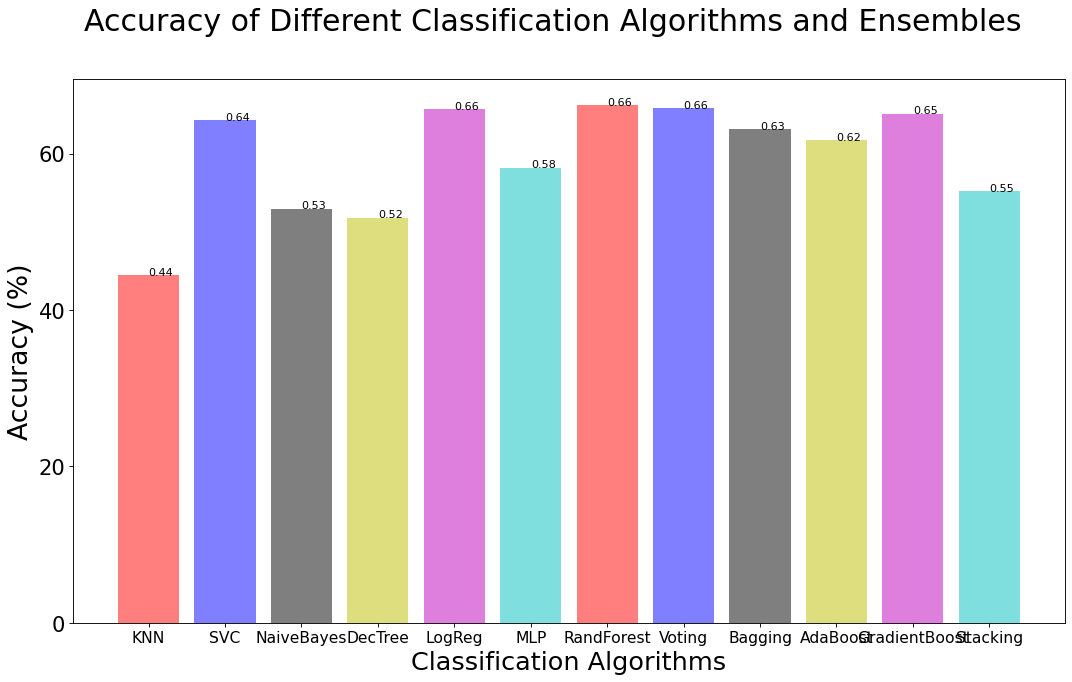

In [23]:
fig = plt.figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')

y_pos = np.arange(len(model_names))
plt.xticks(range(len(model_names)), model_names, fontsize=14)
plt.yticks([0,0.2,0.40,0.60,0.80,1.00], (0,20,40,60,80,100), fontsize=19)
colors =['r','b','k','y','m','c']
    
plt.rcParams['xtick.labelsize'] = 20 
barlist = plt.bar(y_pos, accuracy_scores, color=colors, align='center', alpha=0.5)

plt.ylabel('Accuracy (%)', size = 24)
plt.xlabel("Classification Algorithms", size = 23)
plt.suptitle('Accuracy of Different Classification Algorithms and Ensembles', size = 27)
A = range(len(accuracy_scores))
for xy in zip(A, accuracy_scores):                                     
    plt.annotate('%0.2f' % xy[1], xy = xy, textcoords='data') 
         
plt.show()

### Creating dataframe of accuracy, precision and recall scores

In [27]:
perf_df = pd.DataFrame()
perf_df['model_names'] = model_names
perf_df['accuracy_scores'] = accuracy_scores
perf_df['precision_scores'] = precision_scores
perf_df['recall_scores'] = recall_scores
perf_df = pd.melt(perf_df, id_vars=['model_names'], var_name = 'metric', value_name = 'score')
perf_df.head()

,model_names,metric,score
0,KNN,accuracy_scores,0.444744
1,SVC,accuracy_scores,0.642293
2,NaiveBayes,accuracy_scores,0.529705
3,DecTree,accuracy_scores,0.518072
4,LogReg,accuracy_scores,0.656627


<ipython-input-28-98364d38958c>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['KNN','SVM','NB','DT','LR','MLP','RF','VOTE','BAG','ADA','GD','BOOST'], fontsize = 10)


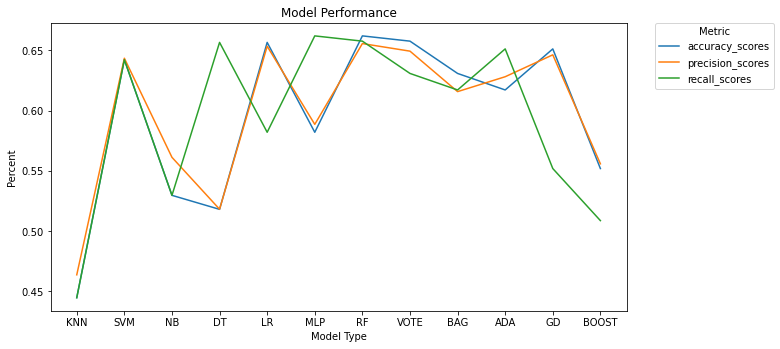

In [28]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])

sns.lineplot(x = 'model_names', y = 'score', hue = 'metric', data = perf_df, ci = None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# ax.set_xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018])
ax.set_xticklabels(['KNN','SVM','NB','DT','LR','MLP','RF','VOTE','BAG','ADA','GD','BOOST'], fontsize = 10)
ax.get_legend().set_title("Metric")
plt.xlabel("Model Type")
plt.ylabel("Percent")
plt.title("Model Performance")
plt.show()

# Confusion Matrix

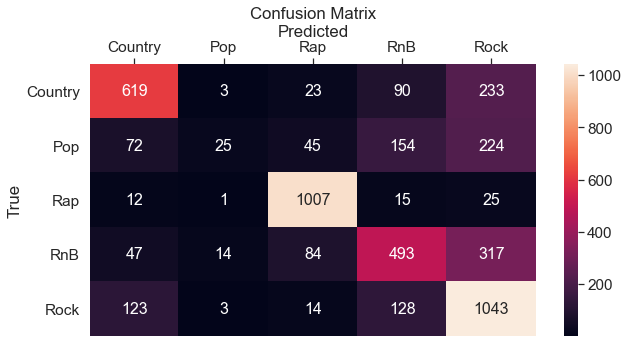

In [29]:
x_axis_labels = ['Country','Pop','Rap','RnB','Rock']
y_axis_labels = ['Country','Pop','Rap','RnB','Rock']
sns.set(font_scale=1.4) # for label size
ax = sns.heatmap(rf_confmatrix,
            annot=True,
            fmt = 'g',
            xticklabels = x_axis_labels,
            yticklabels = y_axis_labels,
            annot_kws={"size": 16}) # font size
plt.xlabel('Predicted')
plt.ylabel('True')
plt.yticks(rotation=0)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.title("Confusion Matrix")
plt.savefig('Confusion-Matrix.png', pad_inches = 0.4)
plt.show()


## Accuracy Scores by Genre

In [30]:
print(rf_report)

              precision    recall  f1-score   support

     Country       0.71      0.64      0.67       968
         Pop       0.54      0.05      0.09       520
         Rap       0.86      0.95      0.90      1060
         RnB       0.56      0.52      0.54       955
        Rock       0.57      0.80      0.66      1311

    accuracy                           0.66      4814
   macro avg       0.65      0.59      0.57      4814
weighted avg       0.66      0.66      0.63      4814



# Number of clusters analysis

In [31]:
# Compute WCSS for different numbers of clusters
wcss = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_tf)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'Number of Clusters Based on Lyrics')

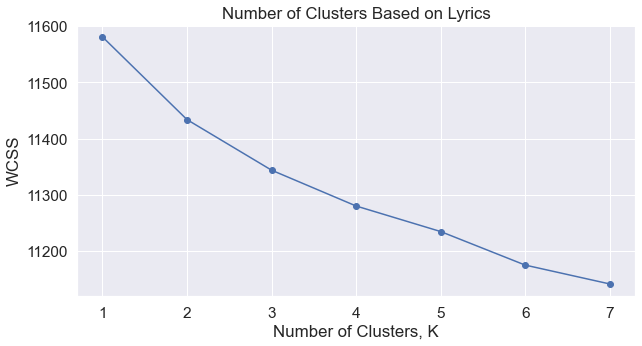

In [32]:
# Plotting number of clusters vs wcss - is there an ideal number of clusters?

plt.plot(np.arange(1,8),wcss,marker="o")
plt.xlabel('Number of Clusters, K')
plt.ylabel('WCSS')
plt.title("Number of Clusters Based on Lyrics")

### Printing out common words from each cluster (assuming 5 genres again)

In [33]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_tf)

order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tf.get_feature_names()
for i in range(5):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: time love never see come night say life take day
Cluster 1: nigga bitch fuck shit ayy gon money em lil wanna
Cluster 2: baby girl want wanna love come need make take say
Cluster 3: la love da baby want feel girl que take make
Cluster 4: love baby need never want heart feel time say make


# Principal Components Plot

In [34]:
# instantiating and fitting principle components object
pca = PCA(n_components=.8)
X_pca = pca.fit(X_tf.toarray())
X_transform = X_pca.transform(X_tf.toarray())

In [35]:
# creating numeric labels for each genre
genre_labels = []
for i in y:
    if i == "Rock":
        genre_labels.append(0)
    if i == "Country":
        genre_labels.append(1)
    if i == "Rap":
        genre_labels.append(2)
    if i == "Pop":
        genre_labels.append(3)
    if i =="RnB":
        genre_labels.append(4)      

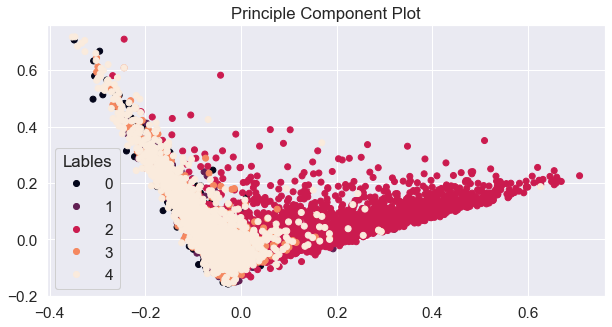

In [36]:
# pulling first two principle components
pc1 = X_transform[:,0]
pc2 = X_transform[:,1]

# creating numeric labels to create scatterplot
labels = genre_labels
my_labels = ['Rock', 'Country', 'Rap', 'Pop', 'RnB']


# Creating scatterplot
fig, ax = plt.subplots()
scatter = ax.scatter(pc1, pc2, c=labels)
plt.title('Principle Component Plot')


# Adding legend
legend = ax.legend(*scatter.legend_elements(), loc="best", title="Lables")
ax.add_artist(legend)